In [1]:
# The IMDB Dataset

from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

train_data[0]

train_labels[0]

max([max(sequence) for sequence in train_data])

word_index= imdb.get_word_index()

reverse_word_index= dict(
    [(value, key) for(key, value) in word_index.items()])

decoded_review= " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]])

In [2]:
# Preparing The Data
# Encoding the integer sequences via multi-hot encoding

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results= np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train= vectorize_sequences(train_data)
x_test= vectorize_sequences(test_data)

x_train[0]

y_train= np.asarray(train_labels).astype("float32")
y_test= np.asarray(test_labels).astype("float32")

In [3]:
# Building The Model

from tensorflow import keras
from tensorflow.keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(16, activation = "relu", input_shape=(10000, )))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,577
Trainable params: 160,577
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Compiling The Model

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [5]:
# Validating The Approach

x_val= x_train[:10000]
partial_x_train= x_train[10000:]

y_val= y_train[:10000]
partial_y_train= y_train[10000:]

In [6]:
# Training The Model

history= model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

history_dict= history.history
history_dict.keys()

Epoch 1/10
118/118 [==============================] - 3s 21ms/step - loss: 0.4114 - accuracy: 0.8333 - val_loss: 0.2905 - val_accuracy: 0.8849
Epoch 2/10
118/118 [==============================] - 2s 17ms/step - loss: 0.2121 - accuracy: 0.9219 - val_loss: 0.2850 - val_accuracy: 0.8856
Epoch 3/10
118/118 [==============================] - 2s 19ms/step - loss: 0.1470 - accuracy: 0.9477 - val_loss: 0.3187 - val_accuracy: 0.8834
Epoch 4/10
118/118 [==============================] - 1s 12ms/step - loss: 0.1076 - accuracy: 0.9625 - val_loss: 0.3842 - val_accuracy: 0.8772
Epoch 5/10
118/118 [==============================] - 2s 13ms/step - loss: 0.0726 - accuracy: 0.9756 - val_loss: 0.4502 - val_accuracy: 0.8719
Epoch 6/10
118/118 [==============================] - 2s 15ms/step - loss: 0.0442 - accuracy: 0.9861 - val_loss: 0.4995 - val_accuracy: 0.8734
Epoch 7/10
118/118 [==============================] - 1s 13ms/step - loss: 0.0253 - accuracy: 0.9932 - val_loss: 0.6399 - val_accuracy: 0.8673

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

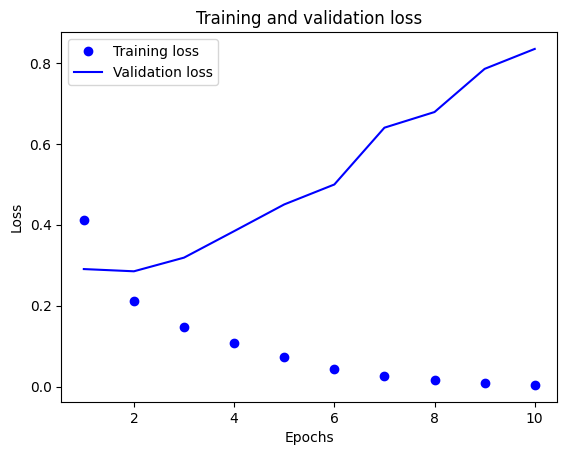

In [7]:
# Plotting The Training & Validation Loss

import matplotlib.pyplot as plt
history_dict= history.history
loss_values= history_dict["loss"]
val_loss_values= history_dict["val_loss"]

epochs= range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot( epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

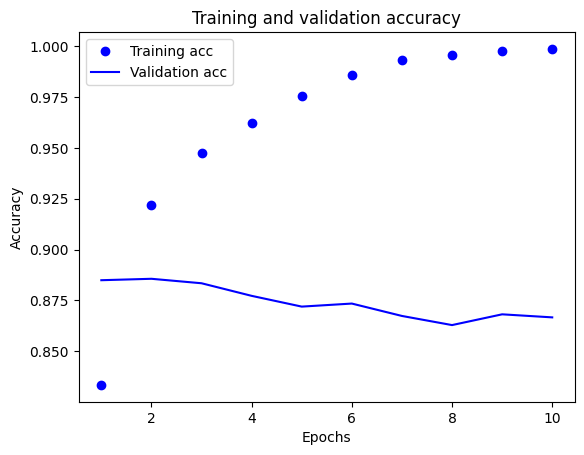

In [8]:
# Plotting The Training & Validation Accuracy

plt.clf()
acc= history_dict["accuracy"]
val_acc= history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [9]:
# Retraining a model from scratch

from keras import models

model = models.Sequential()
model.add(layers.Dense(16, activation = "relu", input_shape=(10000, )))
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                160016    
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(x_train, y_train, epochs=4, batch_size=128)

Epoch 1/4
196/196 [==============================] - 2s 10ms/step - loss: 0.3680 - accuracy: 0.8589
Epoch 2/4
196/196 [==============================] - 2s 10ms/step - loss: 0.2249 - accuracy: 0.9178
Epoch 3/4
196/196 [==============================] - 3s 13ms/step - loss: 0.1839 - accuracy: 0.9323
Epoch 4/4
196/196 [==============================] - 2s 10ms/step - loss: 0.1601 - accuracy: 0.9424


In [11]:
results= model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3048 - accuracy: 0.8812


In [12]:
results

[0.3047749698162079, 0.8811600208282471]